In [1]:
# BiocManager::install("scran")

In [73]:
library(SingleCellExperiment)
library(scran)
library(scater)

In [93]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/covid/full_counts_sce.Rds"

In [94]:
sce = readRDS(filename)
sce

class: SingleCellExperiment 
dim: 45065 141243 
metadata(0):
assays(1): counts
rownames(45065): RP11-34P13.3 FAM138A ... C11orf71.1 LINC01481.1
rowData names(0):
colnames(141243): TCTATTGCACGGTTTA-1-HCATisStab7659969_368C_Madissoon
  CATATGGTCGTCTGAA-1-HCATisStab7646034_367C_Madissoon ...
  CTCGTCAAGTAAGTAC_Donor_02_Reyfman
  TTAGGACCAGCGTTCG-1-HCATisStab7646035_367C_Madissoon
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [95]:
names(colData(sce))

[1] "index"                   "age"                    
 [3] "anatomical_region"       "ann_level_1"            
 [5] "ann_level_2"             "ann_level_3"            
 [7] "ann_level_4"             "ann_level_5"            
 [9] "dataset"                 "donor"                  
[11] "last_author"             "PI"                     
[13] "lung_vs_nasal"           "sample"                 
[15] "sample_last_author_name" "sex"                    
[17] "smoking"                 "total_counts"

In [77]:
colData(sce)$dataset = unlist(colData(sce)$dataset)
table(colData(sce)$dataset)


   Groningen_Nawijn_2019VieiraBraga   Northwestern_Misharin_2018Reyfman 
                              11110                               41778 
         Sanger_Meyer_2019Madissoon Vanderbilt_Kropski_bioRxivHabermann 
                              56711                               31644 

In [78]:
colData(sce)$sample = unlist(colData(sce)$sample)
table(sce$sample)


    343B     356C     367C     368C     390C  ARMS026  ARMS032  ARMS038 
    7905    13520    13321     7186    14779     2082     1615     1493 
 ARMS040  ARMS051  ARMS054 Donor_01 Donor_02 Donor_03 Donor_04 Donor_05 
    1005     2876     2039     5436     3858     5235     5191     5341 
Donor_06 Donor_07 Donor_08  THD0001  THD0002  THD0005   VUHD65   VUHD66 
    4300     7516     4901     2218     2647     3494     2552     2802 
  VUHD67   VUHD68   VUHD69   VUHD70   VUHD71 
    7612     5815      800     1509     2195 

In [79]:
colData(sce)$donor = unlist(colData(sce)$donor)
table(sce$donor)


    343B     356C     367C     368C     390C  ARMS026  ARMS032  ARMS038 
    7905    13520    13321     7186    14779     2082     1615     1493 
 ARMS040  ARMS051  ARMS054 Donor_01 Donor_02 Donor_03 Donor_04 Donor_05 
    1005     2876     2039     5436     3858     5235     5191     5341 
Donor_06 Donor_07 Donor_08  THD0001  THD0002  THD0005   VUHD65   VUHD66 
    4300     7516     4901     2218     2647     3494     2552     2802 
  VUHD67   VUHD68   VUHD69   VUHD70   VUHD71 
    7612     5815      800     1509     2195 

In [80]:
saveRDS(sce,filename)

In [ ]:
###################################
########## Madissoon only 
###################################

In [53]:
# select Madissoon dataset
sce = sce[,sce$dataset == 'Sanger_Meyer_2019Madissoon']

In [58]:
## subselect 
# sample 356C as our "full" dataset
# sample 367C as our "partial" dataset
sce1 = sce[,sce$sample == '356C']
sce2 = sce[,sce$sample == '367C']

In [59]:
sce1

class: SingleCellExperiment 
dim: 45065 13520 
metadata(0):
assays(1): counts
rownames(45065): RP11-34P13.3 FAM138A ... C11orf71.1 LINC01481.1
rowData names(0):
colnames(13520): CTGATAGAGTTGTAGA-1-HCATisStab7587211_356C_Madissoon
  GGATTACGTAGGGACT-1-HCATisStab7587211_356C_Madissoon ...
  GTGCATACATGCCTAA-1-HCATisStab7587211_356C_Madissoon
  AGTGGGAGTGAGGGTT-1-HCATisStab7587211_356C_Madissoon
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [60]:
sce2

class: SingleCellExperiment 
dim: 45065 13321 
metadata(0):
assays(1): counts
rownames(45065): RP11-34P13.3 FAM138A ... C11orf71.1 LINC01481.1
rowData names(0):
colnames(13321): CATATGGTCGTCTGAA-1-HCATisStab7646034_367C_Madissoon
  GTTCATTCATGTAAGA-1-HCATisStab7646032_367C_Madissoon ...
  CCTTACGTCTTAACCT-1-HCATisStab7646033_367C_Madissoon
  TTAGGACCAGCGTTCG-1-HCATisStab7646035_367C_Madissoon
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [ ]:
### using the "full" dataset, estimate a mean-variance trend (using all genes)
# save as dec1
# trend(x) is the learnt function

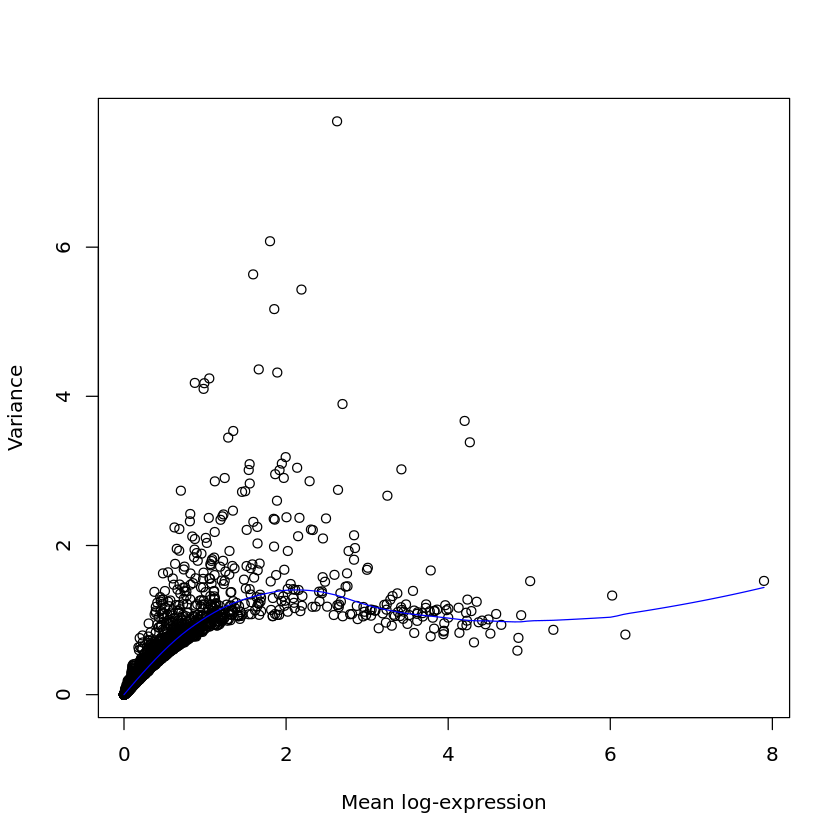

In [61]:
sce = sce1
sce <- scater::logNormCounts(sce)
dec1 <- scran::modelGeneVar(sce)
plot(dec1$mean, dec1$total, xlab="Mean log-expression", ylab="Variance")
curve(metadata(dec1)$trend(x), col="blue", add=TRUE)

In [62]:
sce1 = sce

In [63]:
# do the same for the other datset 
# before subsetting the genes (as ground truth)
sce = sce2
sce <- scater::logNormCounts(sce)
dec2 <- scran::modelGeneVar(sce)

In [64]:
## choose 10 genes at different mean levels
dec = dec2
dec = dec[order(dec$mean),]
selected_genes = c(names(head(dec$mean[dec$mean>0.1],1)),
names(head(dec$mean[dec$mean>0.5],1)),
names(head(dec$mean[dec$mean>1],1)),
names(head(dec$mean[dec$mean>1.5],1)),
names(head(dec$mean[dec$mean>2],1)),
names(head(dec$mean[dec$mean>2.5],1)),
names(head(dec$mean[dec$mean>3],1)),
names(head(dec$mean[dec$mean>4],1)),
names(head(dec$mean[dec$mean>5],1)),
names(head(dec$mean[dec$mean>6],1)))
dec2 = dec
selected_genes

[1] "GFER"  "CCT3"  "EIF3H" "CD99"  "MT2A"  "PFDN5" "RPL7A" "PTMA"  "RPS27"
[10] "B2M"

In [65]:
# subset sce2 (partial) to those 10 genes
sce = sce[selected_genes,]
sce
# remove logcounts and any memories
assay(sce, "logcounts") <- NULL
sce

class: SingleCellExperiment 
dim: 10 13321 
metadata(0):
assays(2): counts logcounts
rownames(10): GFER CCT3 ... RPS27 B2M
rowData names(0):
colnames(13321): CATATGGTCGTCTGAA-1-HCATisStab7646034_367C_Madissoon
  GTTCATTCATGTAAGA-1-HCATisStab7646032_367C_Madissoon ...
  CCTTACGTCTTAACCT-1-HCATisStab7646033_367C_Madissoon
  TTAGGACCAGCGTTCG-1-HCATisStab7646035_367C_Madissoon
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

class: SingleCellExperiment 
dim: 10 13321 
metadata(0):
assays(1): counts
rownames(10): GFER CCT3 ... RPS27 B2M
rowData names(0):
colnames(13321): CATATGGTCGTCTGAA-1-HCATisStab7646034_367C_Madissoon
  GTTCATTCATGTAAGA-1-HCATisStab7646032_367C_Madissoon ...
  CCTTACGTCTTAACCT-1-HCATisStab7646033_367C_Madissoon
  TTAGGACCAGCGTTCG-1-HCATisStab7646035_367C_Madissoon
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [66]:
sce <- scater::logNormCounts(sce)
rowMeans(logcounts(sce))

GFER      CCT3     EIF3H      CD99      MT2A     PFDN5     RPL7A      PTMA 
0.1000038 0.5001210 1.0002579 1.5035684 2.0048406 2.5026851 3.0258262 4.0298904 
    RPS27       B2M 
5.0103990 6.0181680

In [67]:
sce2 = sce

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”

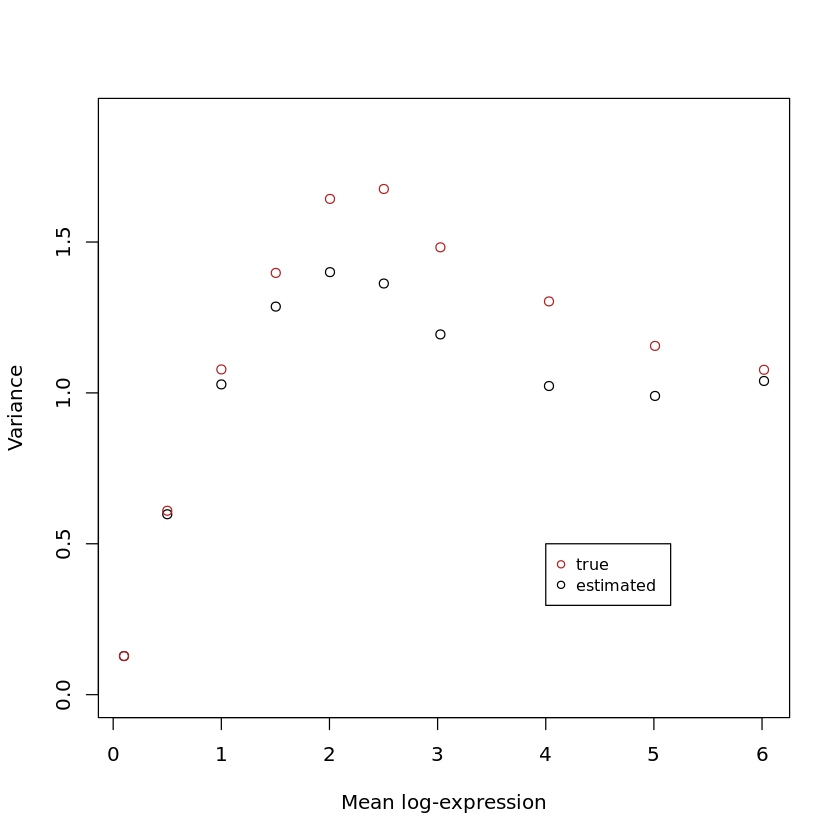

In [72]:
# plot(dec1$mean, metadata(dec1)$trend(dec1$mean))
plot(rowMeans(logcounts(sce2)), metadata(dec1)$trend(rowMeans(logcounts(sce2))),
    xlab="Mean log-expression", ylab="Variance", ylim = c(0,1.9))
dec2 = dec2[selected_genes,]
points(dec2$mean, metadata(dec2)$trend(dec2$mean), add = T, col = "firebrick")
# points(dec1[selected_genes,]$mean, metadata(dec2)$trend(dec1[selected_genes,]$mean), add = T, col = "cornflowerblue")

legend(4,0.5, legend=c("true", "estimated"),
       col=c("firebrick", "black"),pch=c(1,1), cex=0.8)

In [ ]:
###### look at two other samples

In [81]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/covid/full_counts_sce.Rds"
sce = readRDS(filename)
sce

class: SingleCellExperiment 
dim: 45065 141243 
metadata(0):
assays(1): counts
rownames(45065): RP11-34P13.3 FAM138A ... C11orf71.1 LINC01481.1
rowData names(0):
colnames(141243): TCTATTGCACGGTTTA-1-HCATisStab7659969_368C_Madissoon
  CATATGGTCGTCTGAA-1-HCATisStab7646034_367C_Madissoon ...
  CTCGTCAAGTAAGTAC_Donor_02_Reyfman
  TTAGGACCAGCGTTCG-1-HCATisStab7646035_367C_Madissoon
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [82]:
sce = sce[,sce$dataset == 'Sanger_Meyer_2019Madissoon']

In [83]:
table(sce$sample)


 343B  356C  367C  368C  390C 
 7905 13520 13321  7186 14779 

In [84]:
## subselect two different samples (fewer cells)
sce1 = sce[,sce$sample == '343B']
sce2 = sce[,sce$sample == '368C']

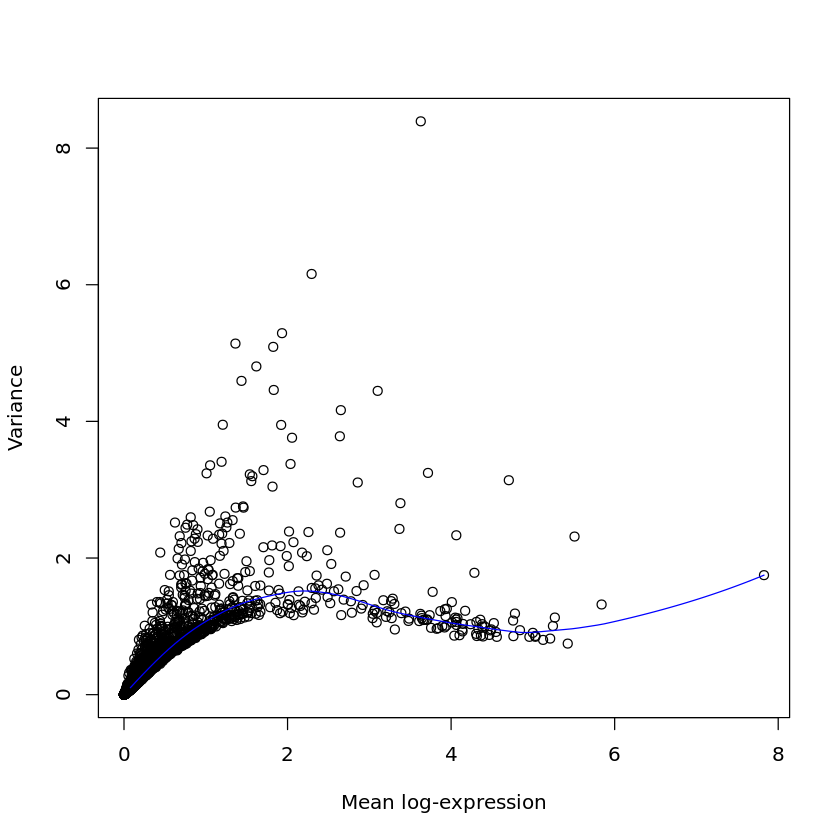

In [85]:
sce = sce1
sce <- scater::logNormCounts(sce)
dec1 <- scran::modelGeneVar(sce)
plot(dec1$mean, dec1$total, xlab="Mean log-expression", ylab="Variance")
curve(metadata(dec1)$trend(x), col="blue", add=TRUE)

In [86]:
sce1 = sce

In [87]:
sce = sce2
sce <- scater::logNormCounts(sce)
dec2 <- scran::modelGeneVar(sce)

In [88]:
## subset to 10 genes at different mean levels
dec = dec2
dec = dec[order(dec$mean),]
selected_genes = c(names(head(dec$mean[dec$mean>0.1],1)),
names(head(dec$mean[dec$mean>0.5],1)),
names(head(dec$mean[dec$mean>1],1)),
names(head(dec$mean[dec$mean>1.5],1)),
names(head(dec$mean[dec$mean>2],1)),
names(head(dec$mean[dec$mean>2.5],1)),
names(head(dec$mean[dec$mean>3],1)),
names(head(dec$mean[dec$mean>4],1)),
names(head(dec$mean[dec$mean>5],1)),
names(head(dec$mean[dec$mean>6],1)))
dec2 = dec
selected_genes

[1] "CDIP1"    "MYL9"     "CCNL1"    "UQCRH"    "MTRNR2L8" "SRGN"    
 [7] "RPL27"    "RPS27A"   "TMSB10"   "TMSB4X"

In [89]:
sce = sce[selected_genes,]
sce
assay(sce, "logcounts") <- NULL
sce

class: SingleCellExperiment 
dim: 10 7186 
metadata(0):
assays(2): counts logcounts
rownames(10): CDIP1 MYL9 ... TMSB10 TMSB4X
rowData names(0):
colnames(7186): TCTATTGCACGGTTTA-1-HCATisStab7659969_368C_Madissoon
  CGTCAGGTCCCATTAT-1-HCATisStab7659969_368C_Madissoon ...
  GATCGTAAGTCATCCA-1-HCATisStab7659968_368C_Madissoon
  GGCAATTAGGCTAGAC-1-HCATisStab7659969_368C_Madissoon
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

class: SingleCellExperiment 
dim: 10 7186 
metadata(0):
assays(1): counts
rownames(10): CDIP1 MYL9 ... TMSB10 TMSB4X
rowData names(0):
colnames(7186): TCTATTGCACGGTTTA-1-HCATisStab7659969_368C_Madissoon
  CGTCAGGTCCCATTAT-1-HCATisStab7659969_368C_Madissoon ...
  GATCGTAAGTCATCCA-1-HCATisStab7659968_368C_Madissoon
  GGCAATTAGGCTAGAC-1-HCATisStab7659969_368C_Madissoon
colData names(18): index age ... smoking total_counts
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [90]:
sce <- scater::logNormCounts(sce)
rowMeans(logcounts(sce))

CDIP1      MYL9     CCNL1     UQCRH  MTRNR2L8      SRGN     RPL27    RPS27A 
0.1000039 0.5001260 1.0008241 1.5048563 2.0067539 2.5404043 3.0355413 4.0577503 
   TMSB10    TMSB4X 
5.0323423 6.3045686

In [91]:
sce2 = sce

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”

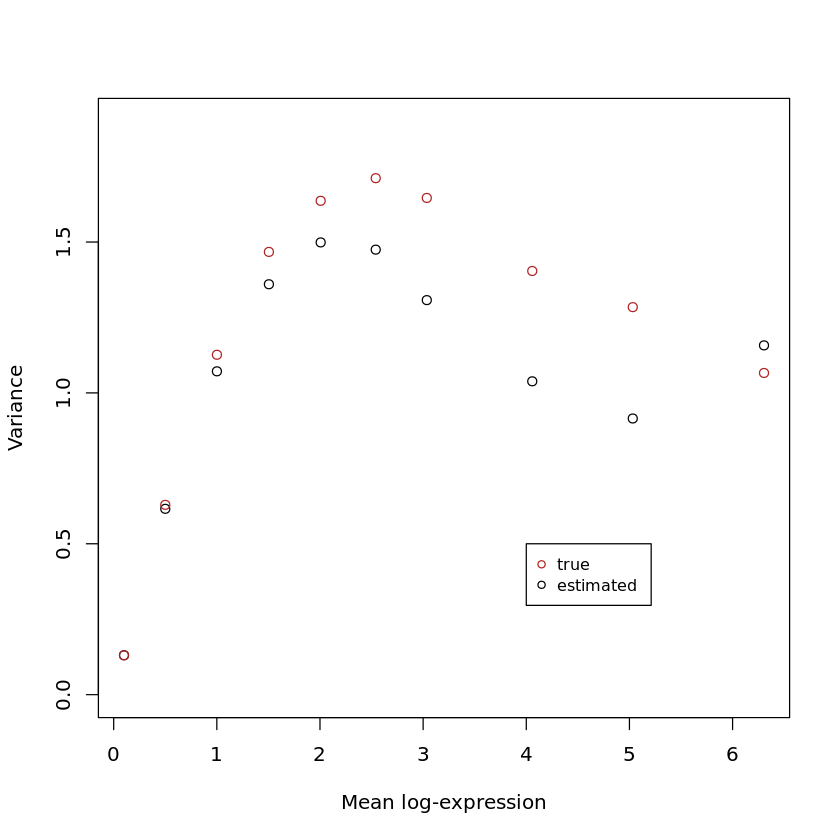

In [92]:
# plot(dec1$mean, metadata(dec1)$trend(dec1$mean))
plot(rowMeans(logcounts(sce2)), metadata(dec1)$trend(rowMeans(logcounts(sce2))),
    xlab="Mean log-expression", ylab="Variance", ylim = c(0,1.9))
dec2 = dec2[selected_genes,]
points(dec2$mean, metadata(dec2)$trend(dec2$mean), add = T, col = "firebrick")
# points(dec1[selected_genes,]$mean, metadata(dec2)$trend(dec1[selected_genes,]$mean), add = T, col = "cornflowerblue")

legend(4,0.5, legend=c("true", "estimated"),
       col=c("firebrick", "black"),pch=c(1,1), cex=0.8)